# Z Score implementation and finding outliers

The Z-score is a statistical measure used to determine how many standard deviations an element is from the mean. It is calculated as the difference between the element and the mean divided by the standard deviation. In Python, you can calculate the Z-score using the following formula:

z_score = (x - mean) / std

 Outliers, in the context of data analysis and statistics, refer to data points or observations that significantly deviate from the rest of the dataset. These data points are considered unusual, abnormal, or different from the majority of the data. Outliers can impact statistical analyses, affect measures of central tendency like the mean and median, and influence the results of data modeling and predictions.

 n the field of data science and machine learning, detecting and handling outliers is crucial to ensure the accuracy and reliability of data analysis. Outliers can arise due to various reasons such as errors in data collection, measurement inaccuracies, natural variability in the data, or intentional introduction for testing statistical methods' robustness. Detecting outliers involves using statistical methods like Z-scores, Interquartile Range (IQR), Tukey's Fences, and visualization tools like box plots and scatter plots to identify and address these anomalous data points.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
dataset = [11,10,12,13,13,14,100,111,110,11,44,33,22,11,5]

In [20]:
outliers = []
def detect_outliers(data):
    threshold = 2
    data_array = np.array(data)
    mean = np.mean(data_array)
    sd = np.std(data_array)

    for data_point in data_array:
        zScore = (data_point - mean) / sd
        if np.abs(zScore) > threshold:
            outliers.append(data_point)

    return outliers


In [21]:
output = detect_outliers(dataset)
print(output)

[110, 111]


(array([9., 1., 1., 1., 0., 0., 0., 0., 1., 2.]),
 array([  5. ,  15.6,  26.2,  36.8,  47.4,  58. ,  68.6,  79.2,  89.8,
        100.4, 111. ]),
 <BarContainer object of 10 artists>)

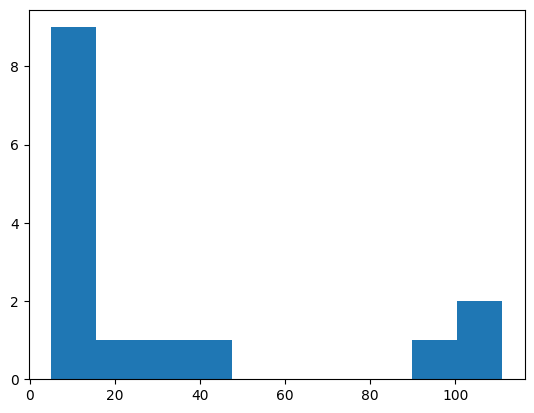

In [22]:
plt.hist(dataset)

# InterQuartile Range

The interquartile range (IQR) is a statistical measure of variability that describes the spread of data within a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of the data. The IQR is resistant to outliers and provides valuable information about the middle 50% of the data, making it a robust measure for understanding the variability within a dataset.

Key points about the interquartile range from the provided sources include:
Definition: The IQR divides the data into quartiles, with Q1 representing the 25th percentile and Q3 representing the 75th percentile. It is calculated as the difference between Q3 and Q1.

Calculation: To calculate the IQR, the data is first sorted in ascending order. Q1 and Q3 are determined, and the IQR is obtained by subtracting Q1 from Q3.
Importance: The IQR is important as it is less sensitive to outliers compared to the range. It helps identify outliers and provides insights into the spread and variability of the dataset.

Usage: The IQR is commonly used in data analysis to understand the central tendency and variability of the data, especially in cases where outliers may skew traditional measures like the mean and standard deviation.

In [24]:
#IQR
# Steps:
#     sort the data
#     calculate Q1 and Q3
#     IQR(Q3 - Q1)
#     Find the lower fence(Q1 - 1.5(iqr))
#     Find the upper fence(Q3 + 1.5(iqr))

dataset = sorted(dataset)
# //sort the dataset
#calculate q1 and q3
q1, q3 = np.percentile(dataset, [25,75])
# print(q1, q3)

IQR = (q3 - q1)

#find lower fence and upper fence
lower_fence = (q1 - 1.5 * IQR)
upper_fence = (q3 + 1.5 * IQR)

# print(lower_fence, upper_fence)
#remove the outliers from the dataset
arrWithoutOutliers = []
for i in dataset:
    if lower_fence <= i <= upper_fence:
        arrWithoutOutliers.append(i)

print(arrWithoutOutliers)


[5, 10, 11, 11, 11, 12, 13, 13, 14, 22, 33, 44]


<Axes: >

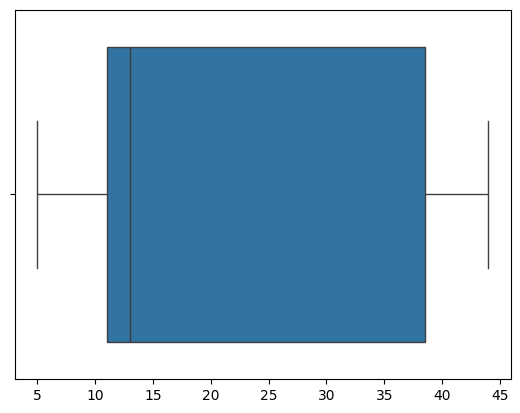

In [36]:
import seaborn as sns 
import statistics 
median = statistics.median(dataset)

boxPlotArr = [min(arrWithoutOutliers), q1, median, q3, max(arrWithoutOutliers)]

#min q1 mean q3 max for to layout boxplot
sns.boxplot(boxPlotArr, orient='h')